In [1]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim

# 1.9 Introduction to Neural Networks
The most widely used definition is Kohonen’s description in 1988. A neural network is a widely parallel interconnected
network composed of adaptable simple units. Its organization can simulate the interaction of the biological nervous
system with real-world objects. reaction.

## Overview
In a biological neural network, each neuron is connected to other neurons. When it is excited, it will send
chemicals to the connected neurons, thereby changing the potential in these neurons; if the potential of
a neuron exceeds one Threshold, then it will activate, that is, get excited and send chemicals to other neurons.

In deep learning, this structure is also used for reference. Each neuron (the simple unit mentioned above)
accepts input x and transmits it through a connection with weight w. The total input signal is compared
with the neuron threshold, and finally passed The activation function process determines whether to activate,
and outputs the calculated result y after activation, and what we call training is the weight w inside.

[Reference](http://www.dkriesel.com/en/science/neural_networks)

The structure of each neuron is as follows:
![](6.png)

[Source](https://becominghuman.ai/from-perceptron-to-deep-neural-nets-504b8ff616e)





## Representation of Neural Network
We can splice neurons together, and two layers of neurons, namely input layer + output layer (M-P neurons),
constitute a perceptron.
And multiple layers of functional neurons are connected to form a neural network, and all layers of neurons
between the input layer and the output layer are called hidden layers:
![](7.png)
As shown in the figure above, there is only one input layer and output layer, and the hidden layer in the middle
can have many layers (the output layer can also be multiple, such as the classic GoogleNet,
which will be described in detail later)

## Activation function
When introducing neural networks, it was said that neurons will stimulate chemical substances.
When it reaches a certain level, neurons will be excited and send information to other neurons.
The activation function in the neural network is used to judge whether the information we calculate
meets the conditions for later transmission.

### Why are activation functions non-linear
In the calculation process of the neural network, each layer is equivalent to matrix multiplication.
No matter how many layers of the neural network, the output is a linear combination of inputs.
Even if we have thousands of layers of calculation, it is nothing more than a matrix multiplication
and one layer The information obtained by matrix multiplication is not very different,
so an activation function is needed to introduce nonlinear factors, so that the neural network
can approach any nonlinear function arbitrarily, so that the neural network can be applied to
many nonlinear models, adding a neural network The characteristics of model generalization.

Early research on neural networks mainly used sigmoid function or tanh function, the output is bounded,
and it is easy to serve as the input of the next layer.
In recent years, Relu functions and their improved versions (such as Leaky-ReLU, P-ReLU, R-ReLU, etc.)
have been widely used in multilayer neural networks due to their simple calculations and good effects.

Here is a summary of the more common activation functions:

In [2]:
# Initialize some information

x = torch.linspace(-10,10,60)

### sigmod function
$a=\frac{1}{1+e^{-z}}$ Derivative: $a^\prime =a(1-a)$

In the sigmod function, we can see that its output is in the open interval (0,1), which can transform
the continuous real value of the input into an output between 0 and 1. If it is a very large negative number,
then the output is 0; If it is a very large positive number, the output is 1, which has a suppressive effect.

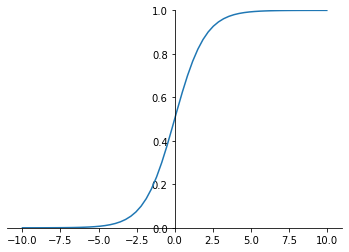

In [3]:
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
plt.ylim((0, 1))
sigmod=torch.sigmoid(x)
plt.plot(x.numpy(),sigmod.numpy())

However, because sigmod needs to perform exponential calculations (this is slower for computers, compared to relu),
and the function output is not centered at 0 (this will reduce the weight update efficiency),
when the input is slightly far away from the coordinate origin , The gradient of the function becomes
very small (almost zero). In the process of neural network back propagation, it is not conducive to the
optimization of weights. This problem is called gradient saturation, or gradient dispersion.
These deficiencies, so sigmod is rarely used now, basically only the output layer when doing
binary classification (0, 1).

### tanh function
$a=\frac{e^z-e^{-z}}{e^z+e^{-z}}$ Derivative: $a^\prime =1-a^2$

tanh is a hyperbolic tangent function, the output interval is between (-1,1), and the entire function
is centered at 0

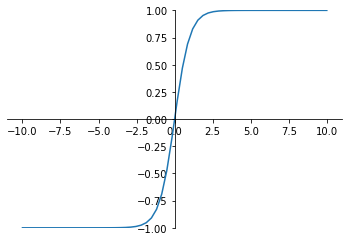

In [4]:
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
plt.ylim((-1, 1))
tanh=torch.tanh(x)
plt.plot(x.numpy(),tanh.numpy())

Similar to the sigmoid function, when the input is slightly far away from the origin of the coordinates,
the gradient will still be small, but fortunately tanh is 0 as the center point. If tanh is used
as the activation function, it can also be normalized (mean value is 0) effect.

In general two classification problems, the hidden layer uses the tanh function, and the output layer
uses the sigmod function, but with the advent of Relu, all hidden layers basically use relu
as the activation function.

### ReLU function
Relu (Rectified Linear Units) corrected linear unit

$a=max(0,z)$ The derivative is 1 when it is greater than 0, and 0 when it is less than 0.

In other words:
When z>0, the gradient is always 1, which improves the calculation speed of the neural network
based on the gradient algorithm. However when
When z<0, the gradient is always 0.
The ReLU function only has a linear relationship (you only need to determine whether the input
is greater than 0) whether it is forward propagation or backward propagation, it is much faster than sigmod and tanh.

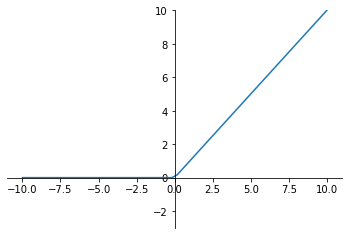

In [5]:
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
plt.ylim((-3, 10))
relu=F.relu(x)
plt.plot(x.numpy(),relu.numpy())

When the input is a negative number, ReLU is not activated at all, which means that once a
negative number is input, ReLU will die. But in the process of backpropagation,
if a negative number is input, the gradient will be completely 0.
This has the same problem as the sigmod function and tanh function.
But in actual application, the influence of this defect is not very big.

### Leaky Relu function
In order to solve the problem when the relu function z<0, the Leaky ReLU function appears,
which guarantees that the gradient is still not 0 when z<0.
The first half of ReLU is set to αz instead of 0, usually α=0.01 $ a=max(\alpha z,z)$

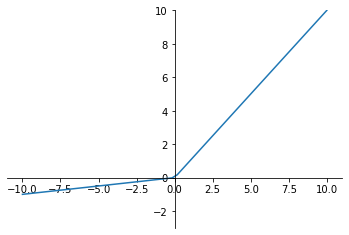

In [6]:
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
plt.ylim((-3, 10))
l_relu=F.leaky_relu(x,0.1) # 0.1 here is for convenience of display, theoretically it should be 0.01 or even smaller value
plt.plot(x.numpy(),l_relu.numpy())

In theory, Leaky ReLU has all the advantages of ReLU, but in actual operation,
it has not been fully proved that Leaky ReLU is always better than ReLU.

ReLU is still the most commonly used activation function. It is recommended to try first in the hidden layer!

## Deep understanding of forward propagation and back propagation
At the end, we will talk about the forward propagation and back propagation in the neural network in detail.
Here we continue to use the blackboard written by Wu Enda
![](8.png)
### Forward communication
For a neural network, the input feature $a^{[0]}$ is our input $x$, put it into the first layer
and calculate the activation function of the first layer, using $a^{[ 1]}$ means that the result
of training in this layer is represented by $W^{[1]}$ and $b^{[l]}$, these two values ​​and
the calculated result $z^{[1 ]}$ values ​​need to be cached, and the calculated results
need to be activated through the activation function to generate $a^{[1]}$, that is,
the output value of the first layer, this value will be passed as the input of the second
layer To the second level, in the second level, you need to use $W^{[2]}$ and $b^{[2]}$,
the calculation result is $z^{[2]}$, the second level Activate the function $a^{[2]}$.
The next few layers and so on, until finally calculated $a^{[L]}$, the final output value
of the $L$ layer $\hat{y}$, which is the predicted value of our network. Forward propagation
is actually the process in which our input $x$ gets $\hat{y}$ through a series of network calculations.

The value we cache in this process will be used in the back propagation.


### Backpropagation
For the back propagation step, it is a series of reverse iterations of the forward propagation,
through the backward calculation of the gradient, to optimize the $W$ and $b$ we need to train.
Differentiate the value of ${\delta}a^{[l]}$ to get ${\delta}a^{[l-1]}$, and so on, until we get
${\delta}a^{ [2]}$ and ${\delta}a^{[1]}$. In the backpropagation step, ${\delta}W^{[l]}$ and
${\delta}b^{[l]}$ are also output. In this step, we have obtained the weight change.
Next, we need to update the training $W$ and $b$ through the learning rate.

$W=W-\alpha{\delta}W $

$b=b-\alpha{\delta}b $

So backpropagation is complete

# PyTorch basics: neural network package nn and optimizer optm
torch.nn is a modular interface specially designed for neural networks.
nn is built on Autograd and can be used to define and run neural networks.
Here we mainly introduce a few commonly used classes

**Convention: torch.nn For convenience, we will set an alias for him as nn.
This chapter has other naming conventions besides nn**

In [7]:

#Print the version


In addition to the nn alias, we also quoted nn.functional.
This package contains some commonly used functions used in neural networks.
The feature of these functions is that they do not have learnable parameters
(such as ReLU, pool, DropOut, etc.). These The function can be placed
in the constructor or not, but it is not recommended here.

Under normal circumstances, we will **set nn.functional to capital F**,
so that the abbreviation is convenient to call

## Define a network
PyTorch has prepared a ready-made network model for us, as long as it inherits
nn.Module and implements its forward method, PyTorch will automatically implement
the backward function according to autograd. In the forward function, any function
supported by tensor can be used. Use Python syntax such as if, for loop, print, log, etc.,
and the writing is consistent with the standard Python writing.

In [8]:
class Net(nn.Module):
    def __init__(self):
        # nn.Module subclass functions must execute the parent class constructor in the constructor
        super(Net, self).__init__()

        # Convolutional layer '1' means that the input picture is a single channel,
        # '6' means the number of output channels, '3' means that the convolution kernel is 3*3
        self.conv1 = nn.Conv2d(1, 6, 3)
        #Linear layer, input 1350 features, output 10 features
        self.fc1 = nn.Linear(1350, 10) #How is 1350 calculated here? This depends
        # on the forward function behind
    #Forward spread
    def forward(self, x):
        print(x.size()) # Result: [1, 1, 32, 32]
        # Convolution -> Activation -> Pooling
        x = self.conv1(x)
        #According to the calculation formula of the convolution
        # size, the calculation result is 30. The specific calculation formula
        # will be described in detail in the fourth section of the second chapter
        # convolution neural network.
        x = F.relu(x)
        print(x.size()) # Result: [1, 6, 30, 30]
        x = F.max_pool2d(x, (2, 2)) #We use the pooling layer, the calculation result is 15
        x = F.relu(x)
        print(x.size()) # Result: [1, 6, 15, 15]
        # reshape, ‘-1’ means adaptive
        #What I did here is the squashing operation, which is to squash the following [1, 6, 15, 15] into [1, 1350]
        x = x.view(x.size()[0], -1)
        print(x.size()) # Here is the input 1350 of the fc1 layer
        x = self.fc1(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1350, out_features=10, bias=True)
)


The learnable parameters of the network are returned by net.parameters()

In [9]:
for parameters in net.parameters():
    print(parameters)

Parameter containing:
tensor([[[[ 0.2702,  0.0397,  0.0404],
          [ 0.1932, -0.3229,  0.3140],
          [-0.3300, -0.0167,  0.0048]]],


        [[[ 0.0924, -0.3067,  0.0579],
          [-0.0284,  0.0638,  0.2350],
          [ 0.1143, -0.2656,  0.0254]]],


        [[[ 0.2242,  0.2953, -0.0609],
          [ 0.3051,  0.0700, -0.2257],
          [-0.0781,  0.2083, -0.1516]]],


        [[[-0.0112,  0.1001, -0.1531],
          [-0.1753,  0.2877,  0.0221],
          [ 0.2879,  0.0122,  0.2594]]],


        [[[ 0.0467, -0.0008,  0.1682],
          [-0.1527,  0.1703,  0.1346],
          [-0.2949,  0.1549,  0.0526]]],


        [[[ 0.0563, -0.3115, -0.1031],
          [-0.0582,  0.2733,  0.1437],
          [-0.0345,  0.1732,  0.0692]]]], requires_grad=True)
Parameter containing:
tensor([ 0.3162, -0.0249,  0.0302, -0.1390, -0.0068,  0.0520],
       requires_grad=True)
Parameter containing:
tensor([[ 0.0201,  0.0156, -0.0113,  ..., -0.0084,  0.0228, -0.0242],
        [ 0.0122, -0.0075,  0

net.named_parameters can return learnable parameters and names at the same time.

In [10]:
for name,parameters in net.named_parameters():
    print(name,':',parameters.size())

conv1.weight : torch.Size([6, 1, 3, 3])
conv1.bias : torch.Size([6])
fc1.weight : torch.Size([10, 1350])
fc1.bias : torch.Size([10])


The input and output of the forward function are both Tensor

In [11]:
input = torch.randn(1, 1, 32, 32) # The input corresponding to the previous fforward here is 32
out = net(input)
out.size()

torch.Size([1, 1, 32, 32])
torch.Size([1, 6, 30, 30])
torch.Size([1, 6, 15, 15])
torch.Size([1, 1350])


torch.Size([1, 10])

In [12]:
input.size()

torch.Size([1, 1, 32, 32])

Before backpropagation, first clear the gradient of all parameters

In [13]:
net.zero_grad()
out.backward(torch.ones(1,10))
# The implementation of backpropagation is automatically implemented by PyTorch, we only need to call this function

**Note**: torch.nn only supports mini-batches, and does not support inputting one sample at a time,
that is, one batch must be entered at a time.

In other words, even if we input a sample, the sample will be divided into batches.
Therefore, all inputs will increase by one dimension. Let’s compare the input just now.
nn is defined as 3 dimensions, but we increase it manually when creating One dimension becomes 4
dimension, the first 1 is batch-size

## Loss function
In nn, PyTorch also prefabricated the commonly used loss function,
below we use MSELoss to calculate the mean square error

In [14]:
y = torch.arange(0,10).view(1,10).float()
criterion = nn.MSELoss()
loss = criterion(out, y)
#loss is a scalar, we can directly use item to get his python type value
print(loss.item())

27.85089683532715


## Optimizer
After calculating the gradients of all parameters in backpropagation,
optimization methods are also needed to update the weights and parameters of the network.
 For example, the update strategy of stochastic gradient descent (SGD) is as follows:

weight = weight-learning_rate * gradient

Realize most of the optimization methods in torch.optim, such as RMSProp,
Adam, SGD, etc. Below we use SGD as a simple example

In [15]:
out = net(input) # When called here, the size of x we ​​printed in the forword function will be printed
criterion = nn.MSELoss()
loss = criterion(out, y)
#Create a new optimizer, SGD only needs to adjust the parameters and learning rate
optimizer = torch.optim.SGD(net.parameters(), lr = 0.01)
# Clear the gradient first (the same effect as net.zero_grad())
optimizer.zero_grad()
loss.backward()

#Update parameters
optimizer.step()

torch.Size([1, 1, 32, 32])
torch.Size([1, 6, 30, 30])
torch.Size([1, 6, 15, 15])
torch.Size([1, 1350])


In this way, a complete dissemination of neural network data has been achieved through PyTorch.
The following chapter will introduce the data loading and processing tools provided by PyTorch,
which can be used to conveniently process the required data.

After reading this section, you may still have doubts about the calculation methods of
some parameters in the neural network model. This part will be introduced in detail in Chapter 2,
Section 4, Convolutional Neural Networks, and in Chapter 3, Section 2 MNIST Data
There are detailed notes in the practical code of handwritten number recognition.